In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from pprint import pprint
viridis = cm.get_cmap('viridis', 10)

In [2]:
#importing the data
data = pd.read_csv("resources\ss13pusa.csv")

In [3]:
#selecting desired columns
col_list= ['SERIALNO','WAGP','NOP','ANC1P','DECADE']

In [4]:
#creating a dataframe with the columns
df = data[col_list]

In [5]:
#checking the dataframe
df.head()

,SERIALNO,WAGP,NOP,ANC1P,DECADE
0,84,0.0,NaN,999,NaN
1,154,52000.0,NaN,902,NaN
2,154,0.0,NaN,902,NaN
3,154,0.0,NaN,902,NaN
4,154,0.0,NaN,902,NaN


In [6]:
#replacing zero with NAN in wage column
df['WAGP'] = df['WAGP'].replace(0, np.nan)
df.head()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SERIALNO,WAGP,NOP,ANC1P,DECADE
0,84,NaN,NaN,999,NaN
1,154,52000.0,NaN,902,NaN
2,154,NaN,NaN,902,NaN
3,154,NaN,NaN,902,NaN
4,154,NaN,NaN,902,NaN


In [7]:
#checking individual countsfor all colmns
df_count = df.count().rename_axis('Column').reset_index(name='Counts')
df_count

,Column,Counts
0,SERIALNO,1613672
1,WAGP,761061
2,NOP,324105
3,ANC1P,1613672
4,DECADE,231280


In [8]:
#checking the counts by decade
df_decade = df['DECADE'].value_counts().rename_axis('Responses').reset_index(name='Counts')
df_decade['Responses'] = df_decade['Responses'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69',
                                                               4.0: '70-79', 5.0: "80-89",
                                                               6.0: "90-99", 7.0: ">00"})
df_decade

,Responses,Counts
0,>00,78150
1,90-99,53793
2,80-89,42759
3,70-79,28033
4,60-69,17037
5,50-59,8408
6,<50,3100


In [9]:
#bining the data to diffrent ethnicity
bins = [0,200,359,370,411,500,600,900,995,999]
labels= ['European','Centeral American','South American','North African','Middle Eastern','African','Asian','American','Other']
df['binned'] = pd.cut(df['ANC1P'], bins=bins, labels=labels)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
#checking the count
df.count().head()

SERIALNO    1613672
WAGP         761061
NOP          324105
ANC1P       1613672
DECADE       231280
dtype: int64

In [11]:
#checking counts for wages
df_wagp = df['WAGP'].value_counts().rename_axis('Responses').reset_index(name='Counts')

In [12]:
df_wagp.head()

,Responses,Counts
0,30000.0,22547
1,40000.0,21124
2,50000.0,20848
3,20000.0,18768
4,60000.0,17357


In [13]:
#checking binned counts
df_binned = df['binned'].value_counts().rename_axis('Responses').reset_index(name='Counts')
df_binned.head()

,Responses,Counts
0,European,661965
1,American,348318
2,Other,254015
3,Centeral American,221861
4,Asian,99836


In [14]:
#average income by ethnicity
df_eth_inc = round (df.groupby("binned")['WAGP'].mean().rename_axis('Ethnicity').reset_index(name='Avg_Income'),2)
df_eth_inc.head()

,Ethnicity,Avg_Income
0,European,51946.05
1,Centeral American,31287.99
2,South American,41570.18
3,North African,58901.89
4,Middle Eastern,56407.93


Text(0, 0.5, 'Ethnicity')

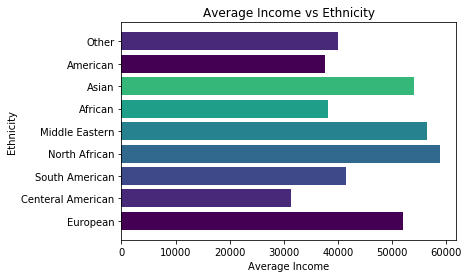

In [15]:
#ploting the average income vs ethnicity
colors =[viridis.colors[0],viridis.colors[1],viridis.colors[2],viridis.colors[3],
         viridis.colors[4],viridis.colors[5],viridis.colors[6]]
plt.barh(df_eth_inc['Ethnicity'],df_eth_inc['Avg_Income'], color = colors)

plt.title('Average Income vs Ethnicity')
plt.xlabel('Average Income')
plt.ylabel('Ethnicity')


In [16]:
#average income by decade of entery
df_dec_inc = round (df.groupby("DECADE")['WAGP'].mean().rename_axis('Decade').reset_index(name='Avg_Income'),2)
df_dec_inc['Decade'] = df_dec_inc['Decade'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69',
                                                               4.0: '70-79', 5.0: "80-89",
                                                               6.0: "90-99", 7.0: ">00"})

Text(0, 0.5, 'Average Income')

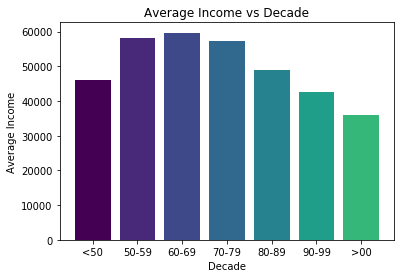

In [17]:
#plot of average income by decade entry
plt.bar(df_dec_inc['Decade'],df_dec_inc['Avg_Income'], color = colors)

plt.title('Average Income vs Decade')
plt.xlabel('Decade')
plt.ylabel('Average Income')


In [18]:
#seperating ethnicity into different dataframes and geting average income by decade for each
df_am = df[df['binned'] == 'American']
df_eu = df[df['binned'] == 'European']
df_ca = df[df['binned'] == 'Centeral American']
df_sa = df[df['binned'] == 'South American']
df_naf = df[df['binned'] == 'North African']
df_me = df[df['binned'] == 'Middle Eastern']
df_af = df[df['binned'] == 'African']
df_as = df[df['binned'] == 'Asian']
df_ot = df[df['binned'] == 'Other']
df_am_test =round (df_am.groupby("DECADE")['WAGP'].mean().rename_axis('Decade').reset_index(name='Avg_Income'),2)
df_eu_test =round (df_eu.groupby("DECADE")['WAGP'].mean().rename_axis('Decade').reset_index(name='Avg_Income'),2)
df_ca_test =round (df_ca.groupby("DECADE")['WAGP'].mean().rename_axis('Decade').reset_index(name='Avg_Income'),2)
df_sa_test =round (df_sa.groupby("DECADE")['WAGP'].mean().rename_axis('Decade').reset_index(name='Avg_Income'),2)
df_naf_test =round (df_naf.groupby("DECADE")['WAGP'].mean().rename_axis('Decade').reset_index(name='Avg_Income'),2)
df_me_test =round (df_me.groupby("DECADE")['WAGP'].mean().rename_axis('Decade').reset_index(name='Avg_Income'),2)
df_af_test =round (df_af.groupby("DECADE")['WAGP'].mean().rename_axis('Decade').reset_index(name='Avg_Income'),2)
df_as_test =round (df_as.groupby("DECADE")['WAGP'].mean().rename_axis('Decade').reset_index(name='Avg_Income'),2)
df_ot_test =round (df_ot.groupby("DECADE")['WAGP'].mean().rename_axis('Decade').reset_index(name='Avg_Income'),2)

df_am_test['Decade'] = df_am_test['Decade'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69', 4.0: '70-79', 5.0: "80-89", 6.0: "90-99", 7.0: ">00"})
df_eu_test['Decade'] = df_eu_test['Decade'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69', 4.0: '70-79', 5.0: "80-89", 6.0: "90-99", 7.0: ">00"})
df_ca_test['Decade'] = df_ca_test['Decade'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69', 4.0: '70-79', 5.0: "80-89", 6.0: "90-99", 7.0: ">00"})
df_sa_test['Decade'] = df_sa_test['Decade'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69', 4.0: '70-79', 5.0: "80-89", 6.0: "90-99", 7.0: ">00"})
df_naf_test['Decade'] = df_naf_test['Decade'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69', 4.0: '70-79', 5.0: "80-89", 6.0: "90-99", 7.0: ">00"})
df_me_test['Decade'] = df_me_test['Decade'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69', 4.0: '70-79', 5.0: "80-89", 6.0: "90-99", 7.0: ">00"})
df_af_test['Decade'] = df_af_test['Decade'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69', 4.0: '70-79', 5.0: "80-89", 6.0: "90-99", 7.0: ">00"})
df_as_test['Decade'] = df_as_test['Decade'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69', 4.0: '70-79', 5.0: "80-89", 6.0: "90-99", 7.0: ">00"})
df_ot_test['Decade'] = df_ot_test['Decade'].replace({1.0: '<50', 2.0: "50-59", 3.0: '60-69', 4.0: '70-79', 5.0: "80-89", 6.0: "90-99", 7.0: ">00"})

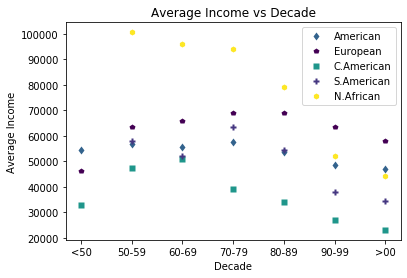

In [28]:
#plotting the graphs
plt.plot(df_am_test['Decade'],df_am_test['Avg_Income'], 'd', markeredgecolor = 'none', markerfacecolor='#33638DFF', label='American')
plt.plot(df_eu_test['Decade'],df_eu_test['Avg_Income'],  'p', markeredgecolor = 'none', markerfacecolor='#440154FF', label='European')
plt.plot(df_ca_test['Decade'],df_ca_test['Avg_Income'], 's',markeredgecolor = 'none', markerfacecolor= '#1F968BFF', label='C.American')
plt.plot(df_sa_test['Decade'],df_sa_test['Avg_Income'], 'P', markeredgecolor = 'none', markerfacecolor= '#453781FF', label='S.American')
plt.plot(df_naf_test['Decade'],df_naf_test['Avg_Income'], 'h', markeredgecolor = 'none', markerfacecolor= '#FDE725FF', label='N.African')
plt.legend(loc='upper right')

plt.title('Average Income vs Decade')
plt.xlabel('Decade')
plt.ylabel('Average Income')
plt.savefig('Ethnic_Incomevsdecade1.png')  

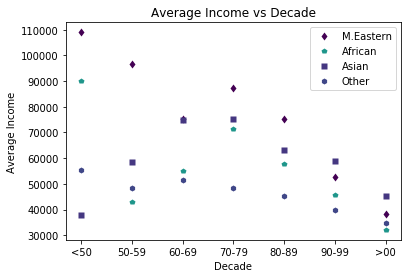

In [29]:
#checking single graph for income by entry

plt.plot(df_me_test['Decade'],df_me_test['Avg_Income'], 'd', markeredgecolor = 'none', markerfacecolor= '#440154FF', label = 'M.Eastern')
plt.plot(df_af_test['Decade'],df_af_test['Avg_Income'], 'p', markeredgecolor = 'none', markerfacecolor= '#1F968BFF', label = 'African')
plt.plot(df_as_test['Decade'],df_as_test['Avg_Income'], 's', markeredgecolor = 'none', markerfacecolor= '#453781FF', label = 'Asian')
plt.plot(df_ot_test['Decade'],df_ot_test['Avg_Income'], 'h', markeredgecolor = 'none', markerfacecolor= '#404788FF', label='Other')
plt.legend(loc='upper right')

plt.title('Average Income vs Decade')
plt.xlabel('Decade')
plt.ylabel('Average Income')
plt.savefig('Ethnic_Incomevsdecade2.png')  